# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [61]:
import pandas as pd
from sklearn.linear_model import LogisticRegression              
from sklearn.model_selection import train_test_split as tts 
from sklearn.preprocessing import StandardScaler              
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm

## Regression Model Evaluation

In [4]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# separo las características (X) y la variable objetivo (y)
X=data.drop(['MEDV'], axis=1)

y=data.MEDV

# divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = tts(X, y,                 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=40)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [10]:
#creo el modelo de regresión lineal
linreg=LinReg()

#entreno el modelo en el conjunto de entrenamiento
linreg.fit(X_train, y_train)

#genero predicciones en el conjunto de entrenamiento
y_pred_train = linreg.predict(X_train)

#genero predicciones en el conjunto de prueba
y_pred_test = linreg.predict(X_test)

In [11]:
y_pred_train

array([1.02421204, 1.5463696 , 1.34449633, ..., 1.99921332, 2.93284174,
       2.92399608])

In [12]:
y_pred_test

array([2.00412998, 2.57561917, 1.19769801, ..., 2.42460902, 1.73085934,
       1.35765516])

In [13]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

## 3. Calculate and print R-squared for both the training and the testing set.

In [20]:
#calculo r-squared para el conjunto de entrenamiento
r2(y_test, y_pred_test)

array([2.00412998, 2.57561917, 1.19769801, ..., 2.42460902, 1.73085934,
       1.35765516])

In [22]:
#calculo r-squared para el conjunto de prueba
r2(y_train, y_pred_train)

0.6056066227644388

## 4. Calculate and print mean squared error for both the training and the testing set.

In [25]:
# calculo el MSE para el conjunto de entrenamiento
mse(y_train, y_pred_train)

0.5202233101752235

In [26]:
# calculo el MSE para el conjunto de prueba
mse(y_test, y_pred_test)

0.5417517275769405

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [28]:
# calculo el MAE para el conjunto de entrenamiento
mae(y_train, y_pred_train)

0.5287028186108876

In [29]:
# calculo el MAE para el conjunto de prueba
mae(y_test, y_pred_test)

0.5389572480554747

## Classification Model Evaluation

In [30]:
from sklearn.datasets import load_iris

data = load_iris() 

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [36]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [39]:
# creo un modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)

# entreno el modelo en el conjunto de entrenamiento
logreg.fit(X_train, y_train)

# genero predicciones en el conjunto de entrenamiento
y_pred_train = logreg.predict(X_train)

# Genero predicciones en el conjunto de prueba
y_pred_test = logreg.predict(X_test)

/Users/davidledo/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [42]:
acc(y_test, y_pred_test)

1.0

In [43]:
acc(y_train, y_pred_train)

0.975

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [47]:
train_balanced_accuracy = balanced_accuracy_score(y_train, y_pred_train)
print(train_balanced_accuracy)

0.975609756097561


In [48]:
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
print(test_balanced_accuracy)

1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [50]:
prec(y_test, y_pred_test, average = 'macro')

1.0

In [51]:
prec(y_train, y_pred_train, average = 'macro')

0.9761904761904763

## 11. Calculate and print the recall score for both the training and the testing set.

In [54]:
rec(y_test, y_pred_test, average = 'macro')

1.0

In [55]:
rec(y_train, y_pred_train, average = 'macro')

0.975609756097561

## 12. Calculate and print the F1 score for both the training and the testing set.

In [58]:
f1(y_test, y_pred_test, average = 'macro')

1.0

In [59]:
f1(y_train, y_pred_train, average = 'macro')


0.9749960931395533

## 13. Generate confusion matrices for both the training and the testing set.

In [62]:
cm(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

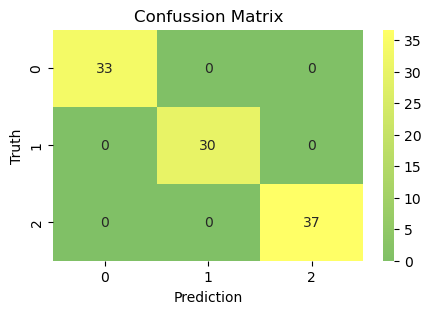

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(5, 3))

sns.heatmap(cm(y_test, y_pred_test)/cm(y_test, y_pred_test).sum() * 100, 
               annot=True,
               cmap='summer',
               center = 0 )

plt.title('Confussion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.